#1 Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras.layers as tfl
from fastai.vision.all import *
from fastai.metrics import accuracy, error_rate
from fastai.vision.core import imagenet_stats, PILImage
from fastai.vision.data import ImageDataLoaders
from fastai.vision.augment import aug_transforms, Resize
from fastai.vision.learner import cnn_learner, vision_learner
from fastai.data.transforms import Normalize

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomCrop, RandomZoom, RandomContrast
import torchvision.models as models



# 1.1 Create the Dataset and Split it into Training and Validation Sets


# 2 Preprocess and Augment Training Data

In [2]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
directory = "D:\\University\\ArchitectureStyles\\archive-small\\arcDataset"
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             label_mode='categorical',
                                             subset='training',

                                             seed=42)
validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             label_mode='categorical',
                                             seed=42)

Found 4794 files belonging to 26 classes.
Using 3836 files for training.
Found 4794 files belonging to 26 classes.
Using 958 files for validation.


In [3]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

Augumented images

# 3 Using EfficientNetV2

In [4]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


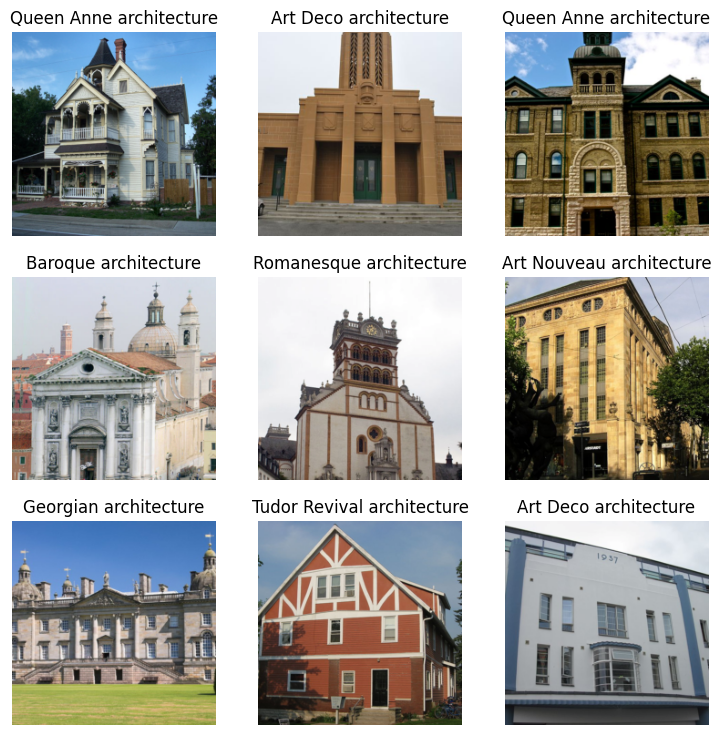

In [5]:
tfms = aug_transforms(do_flip=True, flip_vert=False, max_rotate=10, max_zoom=1.1,
                      max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75, size=224)



data = ImageDataLoaders.from_folder(directory, train=".", valid_pct=0.2, item_tfms=Resize(224),
                                  size=224, num_workers=4, padding_mode='reflection', bs=64,  batch_tfms=Normalize.from_stats(*imagenet_stats))


data.show_batch()

In [6]:
learn = vision_learner(data, models.efficientnet_b0,metrics=[accuracy, error_rate], wd=1e-1)

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to C:\Users\User/.cache\torch\hub\checkpoints\efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:01<00:00, 11.6MB/s]


In [7]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,error_rate,time


KeyboardInterrupt: 

Results

In [ ]:
# learn.recorder.plot()
# learn.save('stage-1-mobilenet3')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(6, lr_max=slice(1e-5, 1e-4))

In [ ]:

learn.save('stage-2-efficientnet3')